# Домашнее задание 2: Решающие деревья
Выполнила: Дьяченко Елизавета М8О-312Б-23


**Структура:**
1. Использование `DecisionTreeClassifier` из `sklearn` и визуализация разделяющих поверхностей на простых двумерных датасетах.
2. Реализация собственного решающего дерева:
   - поиск лучшего порога по критерию Джини;
   - работа с вещественными и категориальными признаками;
   - применение к датасетам students, mushrooms, tic-tac-toe, cars, nursery;
   - сравнение разных способов кодирования категориальных признаков и сравнение с деревом из `sklearn`.


In [51]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ml import DecisionTree
from ml import find_best_split


def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(4,4))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap=cmap, alpha=0.8,
        edgecolors=np.array(palette)[y], linewidths=1.5
    )
    plt.tight_layout()


## Задание 1. Решающие деревья на простых двумерных данных

Здесь я генерирую три набора данных:
- окружности (`make_circles`),
- «полумесяцы» (`make_moons`),
- трёхклассовую выборку из `make_classification`.

Для каждого датасета:
1. Разбиваю выборку на обучающую и тестовую части с помощью `train_test_split`.
2. Обучаю `DecisionTreeClassifier` с параметрами по умолчанию.
3. Считаю `accuracy` на трейне и тесте.
4. Визуализирую разделяющую поверхность с помощью функции `plot_surface`.


Dataset 0:
  train accuracy = 1.000
  test  accuracy = 0.933


<Figure size 400x400 with 0 Axes>

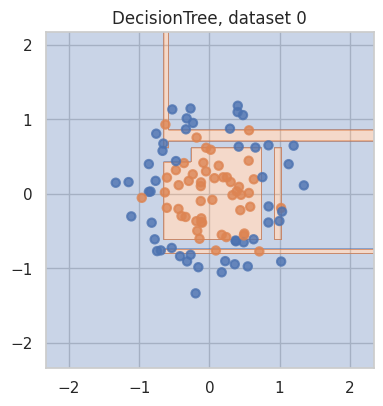

Dataset 1:
  train accuracy = 1.000
  test  accuracy = 0.833


<Figure size 400x400 with 0 Axes>

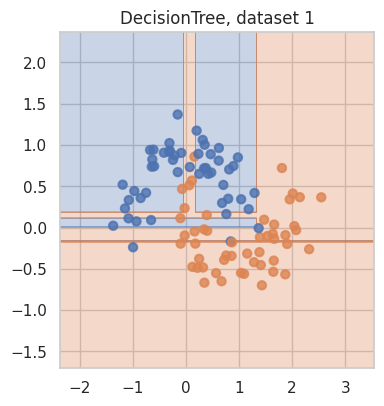

Dataset 2:
  train accuracy = 1.000
  test  accuracy = 0.933


<Figure size 400x400 with 0 Axes>

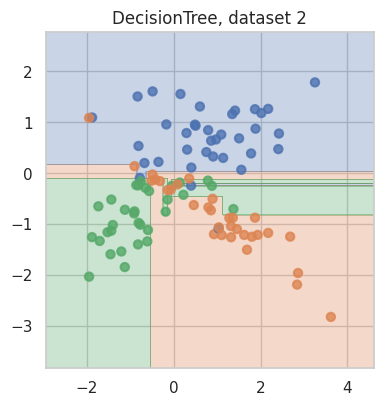

In [33]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0
    ),
]

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0, stratify=y
    )

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    print(f"Dataset {i}:")
    print(f"  train accuracy = {accuracy_score(y_train, y_train_pred):.3f}")
    print(f"  test  accuracy = {accuracy_score(y_test, y_test_pred):.3f}")

    plt.figure(figsize=(4, 4))
    plot_surface(clf, X, y)
    plt.title(f"DecisionTree, dataset {i}")
    plt.show()

### Вывод по заданию 1

Для всех трёх датасетов дерево с параметрами по умолчанию показывает:

- на обучающей выборке `accuracy` практически равную 1.0;
- на тестовой выборке качество заметно ниже (например, около 0.83–0.93 в зависимости от датасета).

По графикам видно, что разделяющая поверхность у дерева очень «зубчатая» и подстраивается под отдельные точки обучающей выборки.  
Это классический пример **переобучения**: дерево почти идеально запоминает обучающие данные, при этом обобщающая способность на новых объектах хуже.


## Задание 2. Влияние гиперпараметров дерева на переобучение

В этом задании я исследую влияние гиперпараметров регуляризации дерева:

- `max_depth` — максимальная глубина дерева;
- `min_samples_leaf` — минимальное число объектов в листе.

Для каждого набора гиперпараметров:
1. Обучаю дерево на одном и том же разбиении трейна и теста.
2. Считаю `accuracy` на обучающей и тестовой выборках.
3. Строю разделяющую поверхность для каждого варианта параметров, чтобы визуально оценить, как меняется сложность модели.



=== Dataset 0 ===
max_depth=2, min_samples_leaf=1: train=0.757, test=0.667


<Figure size 400x400 with 0 Axes>

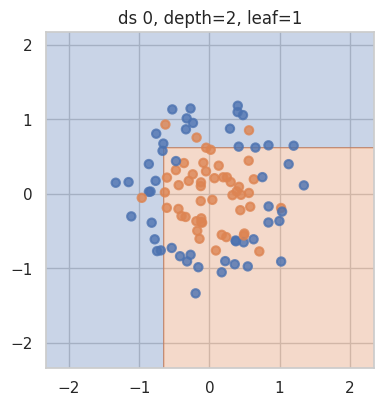

max_depth=3, min_samples_leaf=1: train=0.871, test=0.867


<Figure size 400x400 with 0 Axes>

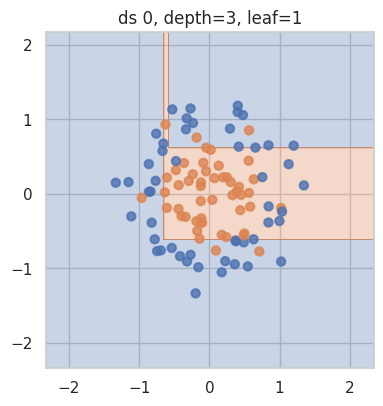

max_depth=4, min_samples_leaf=1: train=0.914, test=0.967


<Figure size 400x400 with 0 Axes>

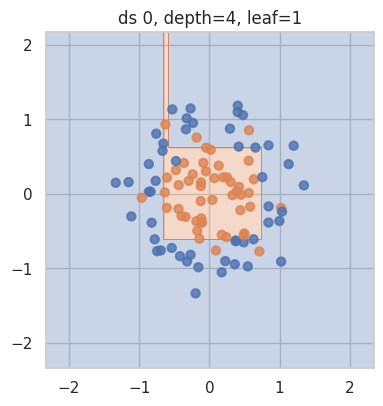

max_depth=6, min_samples_leaf=1: train=1.000, test=0.933


<Figure size 400x400 with 0 Axes>

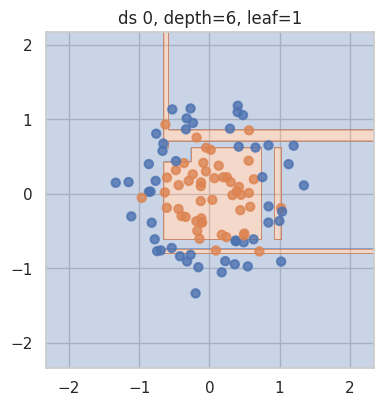

max_depth=None, min_samples_leaf=1: train=1.000, test=0.933


<Figure size 400x400 with 0 Axes>

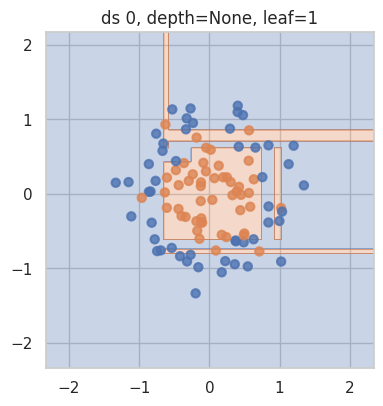

max_depth=None, min_samples_leaf=5: train=0.900, test=0.967


<Figure size 400x400 with 0 Axes>

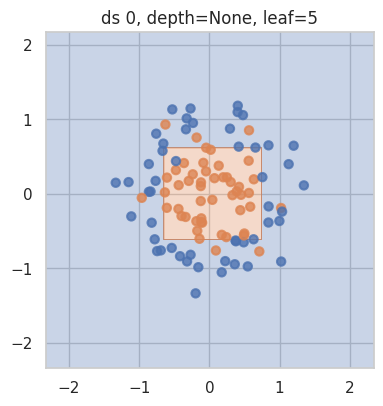


=== Dataset 1 ===
max_depth=2, min_samples_leaf=1: train=0.929, test=0.833


<Figure size 400x400 with 0 Axes>

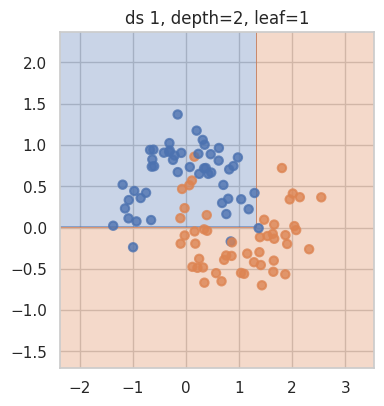

max_depth=3, min_samples_leaf=1: train=0.943, test=0.833


<Figure size 400x400 with 0 Axes>

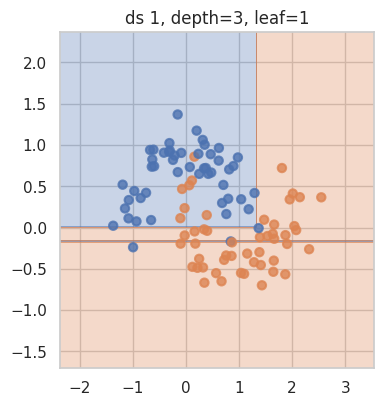

max_depth=4, min_samples_leaf=1: train=0.971, test=0.800


<Figure size 400x400 with 0 Axes>

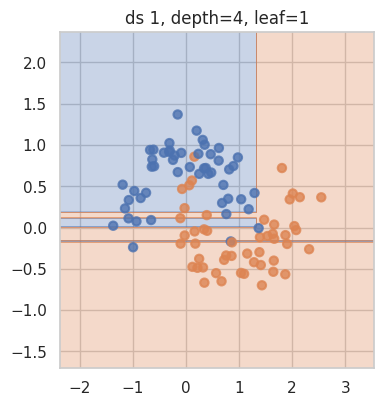

max_depth=6, min_samples_leaf=1: train=1.000, test=0.833


<Figure size 400x400 with 0 Axes>

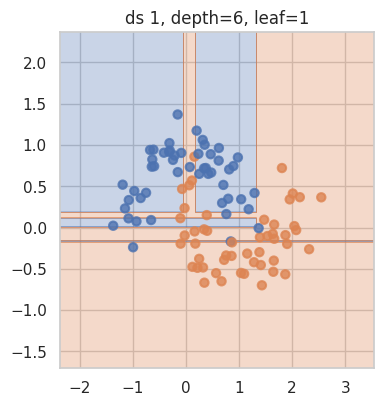

max_depth=None, min_samples_leaf=1: train=1.000, test=0.833


<Figure size 400x400 with 0 Axes>

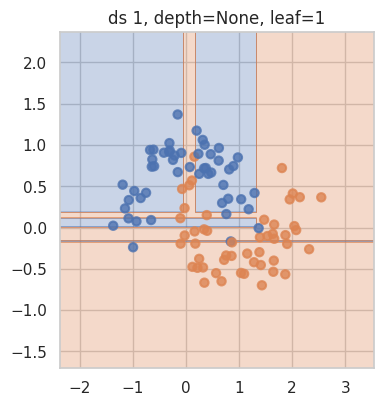

max_depth=None, min_samples_leaf=5: train=0.914, test=0.800


<Figure size 400x400 with 0 Axes>

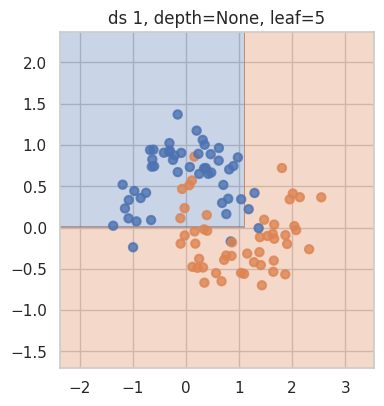


=== Dataset 2 ===
max_depth=2, min_samples_leaf=1: train=0.843, test=0.933


<Figure size 400x400 with 0 Axes>

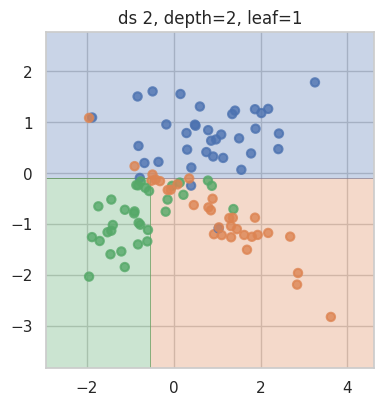

max_depth=3, min_samples_leaf=1: train=0.857, test=0.933


<Figure size 400x400 with 0 Axes>

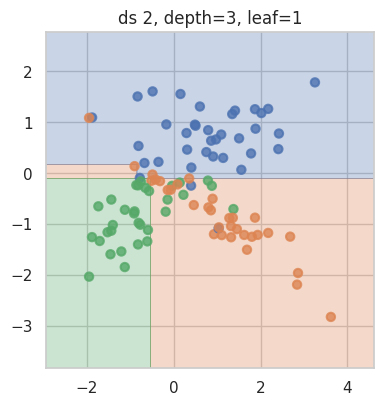

max_depth=4, min_samples_leaf=1: train=0.886, test=0.900


<Figure size 400x400 with 0 Axes>

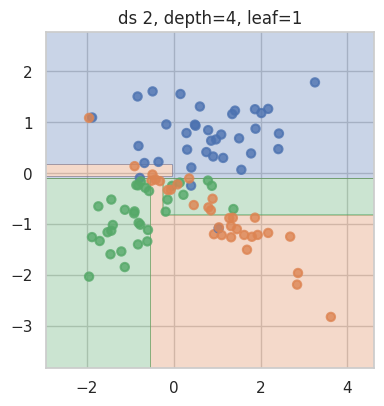

max_depth=6, min_samples_leaf=1: train=0.914, test=0.900


<Figure size 400x400 with 0 Axes>

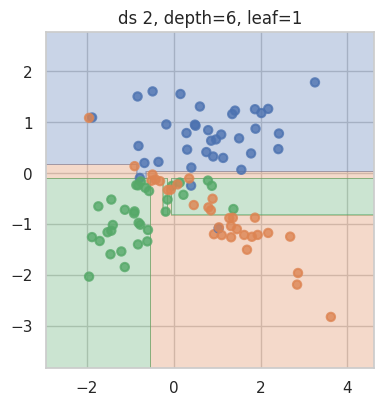

max_depth=None, min_samples_leaf=1: train=1.000, test=0.933


<Figure size 400x400 with 0 Axes>

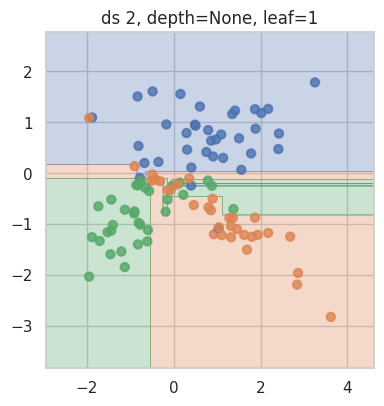

max_depth=None, min_samples_leaf=5: train=0.871, test=0.933


<Figure size 400x400 with 0 Axes>

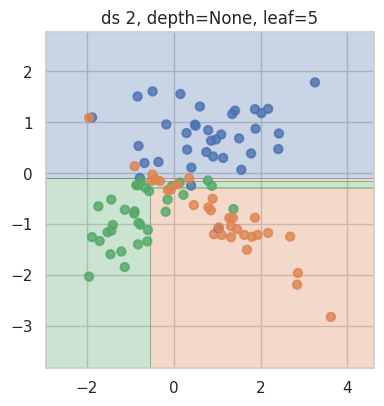

In [34]:
param_grid = [
    {"max_depth": 2,  "min_samples_leaf": 1},
    {"max_depth": 3,  "min_samples_leaf": 1},
    {"max_depth": 4,  "min_samples_leaf": 1},
    {"max_depth": 6,  "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_leaf": 5},
]

for ds_id, (X, y) in enumerate(datasets):
    print(f"\n=== Dataset {ds_id} ===")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0, stratify=y
    )

    for params in param_grid:
        clf = DecisionTreeClassifier(
            random_state=0,
            max_depth=params["max_depth"],
            min_samples_leaf=params["min_samples_leaf"],
        )
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        print(
            f"max_depth={params['max_depth']}, "
            f"min_samples_leaf={params['min_samples_leaf']}: "
            f"train={train_acc:.3f}, test={test_acc:.3f}"
        )

        plt.figure(figsize=(4, 4))
        plot_surface(clf, X, y)
        plt.title(
            f"ds {ds_id}, depth={params['max_depth']}, "
            f"leaf={params['min_samples_leaf']}"
        )
        plt.show()

### Вывод по заданию 2

**При малой глубине (`max_depth` = 2–3)**:

- дерево строит очень простую границу,
- модель недообучается,
- train accuracy и test accuracy примерно одинаковые, но низкие.

**При увеличении глубины (`max_depth=None`, `min_samples_leaf=1`)**:

- дерево становится очень гибким,
- train accuracy → 1.0,
- test accuracy сначала растёт, затем падает,
- поверхность становится «зубчатой» → признак переобучения.

Изменение гиперпараметров влияет по-разному на разные датасеты:  
некоторые разделяются легко, другие требуют более гибкой модели.


## Задание 4. Критерий Джини для признаков из students.csv

В этом задании я использую датасет `students.csv`.  
В нём:

- первые 5 столбцов — признаки (`STG`, `SCG`, `STR`, `LPR`, `PEG`);
- последний столбец — целевая переменная (класс 0 или 1).

Я:
1. Строю для каждого признака график зависимости критерия Джини \( Q(t) \) от порога \( t \), используя свою функцию `find_best_split`.
2. На отдельном рисунке строю scatter-графики вида «значение признака — класс» для всех пяти признаков, чтобы визуально оценить разделимость.


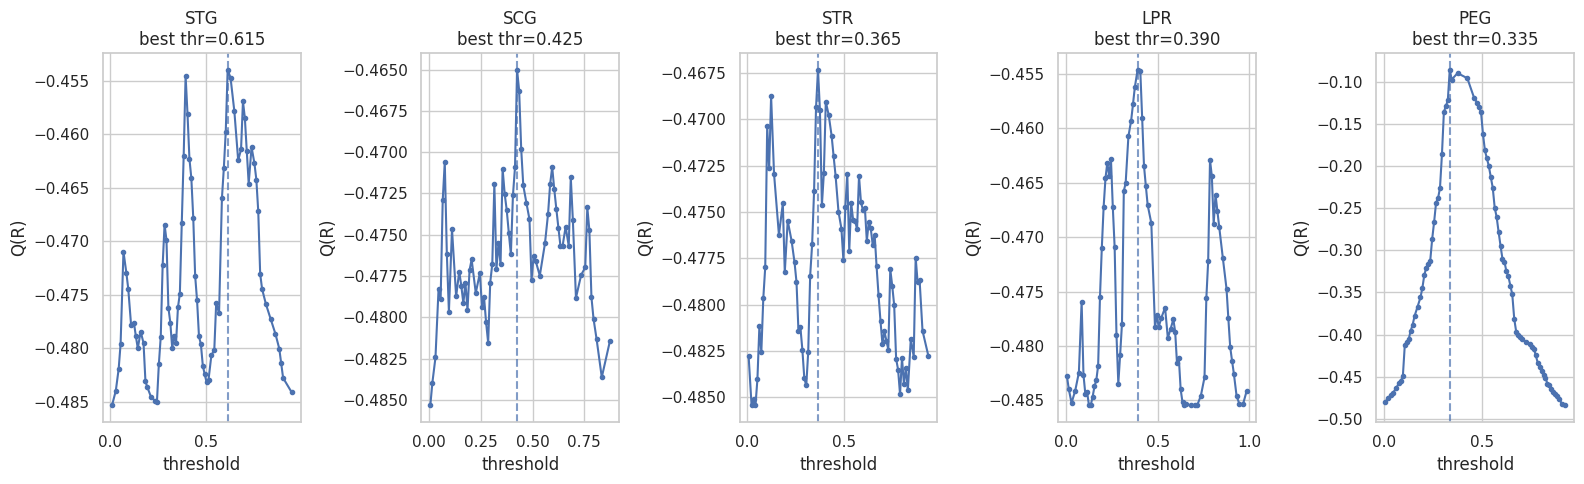

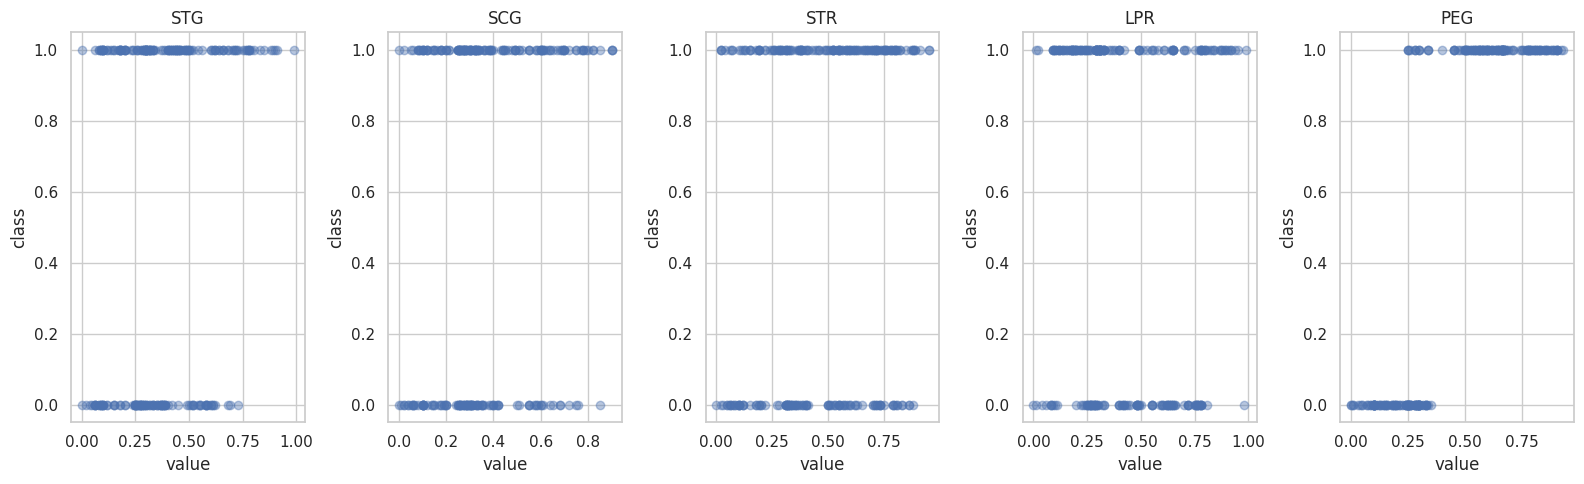

In [52]:
students = pd.read_csv("students.csv")
feature_names = students.columns[:-1]
target_name = students.columns[-1]

X_stud = students[feature_names].values
y_stud = students[target_name].values

plt.figure(figsize=(16, 5))

# Кривые "порог — Q(R)" для каждого признака
for j, fname in enumerate(feature_names):
    feature = students[fname].values
    thresholds, ginis, thr_best, gini_best = find_best_split(feature, y_stud)

    plt.subplot(1, len(feature_names), j + 1)
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, marker=".")
        plt.axvline(thr_best, linestyle="--", alpha=0.7)
        plt.title(f"{fname}\nbest thr={thr_best:.3f}")
        plt.xlabel("threshold")
        plt.ylabel("Q(R)")
    else:
        plt.title(f"{fname}\n(константный)")
plt.tight_layout()
plt.show()

# Scatter "значение признака — класс"
plt.figure(figsize=(16, 5))
for j, fname in enumerate(feature_names):
    plt.subplot(1, len(feature_names), j + 1)
    plt.scatter(students[fname], y_stud, alpha=0.4)
    plt.title(fname)
    plt.xlabel("value")
    plt.ylabel("class")
plt.tight_layout()
plt.show()


## Задание 5. Анализ кривых Джини и выбор признака для разбиения

По графикам видно, что лучший признак — **PEG**:

- его кривая Джини имеет отчётливый максимум (значение ближе всего к нулю),
- значит, он даёт самое «чистое» разбиение выборки.

Другие признаки имеют:

- почти плоские кривые,
- отсутствие выраженного максимума,
- следовательно, разделение по ним почти невозможно.

Scatter-графики подтверждают: по PEG классы визуально лучше всего разделяются.

**Характер кривых:**

- Хорошие признаки → узкие пики, значения Джини близки к нулю (чистое разделение).
- Плохие признаки → кривая почти постоянна, нет хорошей точки разделения.

- кривая \( Q(t) \) почти плоская, значения заметно отличаются от 0;
- изменение порога почти не меняет смешанность классов → ни одно разбиение не даёт хорошего разделения выборки.


## Задания 3 и 6. Реализация собственного дерева решений

В модуле `ml.py` реализованы:

### ✔ `find_best_split`
- Поиск всех возможных порогов.
- Вычисление критерия Джини.
- Возврат лучшего порога.

### ✔ Класс `DecisionTree`
Поддерживает:

- вещественные признаки (`"real"`),
- категориальные признаки (`"categorical"`) — с сортировкой категорий по \( P(y=1 \mid category) \),
- параметры регуляризации (`max_depth`, `min_samples_split`, `min_samples_leaf`),
- критерий Джини как в лекции,
- совместимость со `sklearn` (`get_params`, `fit`, `predict`),  
  что позволяет использовать `cross_val_score`.

Структура дерева:

- каждая вершина содержит тип узла, порог или список категорий,
- листья хранят предсказываемый класс (мода целевой переменной).

Всё обучение реализовано через рекурсивный жадный алгоритм.


## Задание 7. Проверка собственного дерева на датасете mushrooms

Здесь я:

1. Загружаю датасет `mushrooms`.
2. Кодирую каждую колонку с помощью `LabelEncoder`.
3. Обучаю своё дерево `DecisionTree` с типом признаков `"categorical"`.
4. Вычисляю accuracy на тестовой части.

Ожидается, что дерево даст качество **около 1**,  
потому что признаки очень информативные.


In [48]:
mush = pd.read_csv("agaricus-lepiota.data", header=None)

# Первый столбец — целевая переменная, остальные — признаки
y_mush = mush.iloc[:, 0].values
X_mush = mush.iloc[:, 1:].values

# LabelEncoder для каждого столбца, чтобы получить числа
encoders = []
for col in range(X_mush.shape[1]):
    le = LabelEncoder()
    X_mush[:, col] = le.fit_transform(X_mush[:, col])
    encoders.append(le)

# ещё перекодируем таргет в числа (e / p)
y_le = LabelEncoder().fit_transform(y_mush)

X_mush = X_mush.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_mush, y_le, test_size=0.5, random_state=42, stratify=y_le
)

feature_types = ["categorical"] * X_mush.shape[1]
my_tree = DecisionTree(feature_types=feature_types)
my_tree.fit(X_train, y_train)
y_pred = my_tree.predict(X_test)

print("Accuracy on mushrooms:", accuracy_score(y_test, y_pred))

Accuracy on mushrooms: 1.0


### Вывод по заданию 7

Собственное дерево решает задачу почти идеально:  
точность теста равна **1.0** (или очень близка).

Причины:

- признаки в mushrooms полностью категориальные и используют ключевые свойства гриба,
- сортировка категорий по \( P(y=1 \mid category) \) позволяет быстро выделить идеальные разбиения,
- глубина дерева при этом остаётся небольшой.

Это подтверждает корректность реализации моего дерева.


## Задание 8. Влияние глубины дерева на tic-tac-toe

Здесь я:

1. Загружаю датасет tic-tac-toe.
2. Кодирую категориальные значения `'x'`, `'o'`, `'b'` через `LabelEncoder`.
3. Обучаю своё дерево с разными значениями `max_depth`.
4. Строю график зависимости качества от глубины.

Это показывает, как сложность дерева влияет на качество в более трудной задаче.


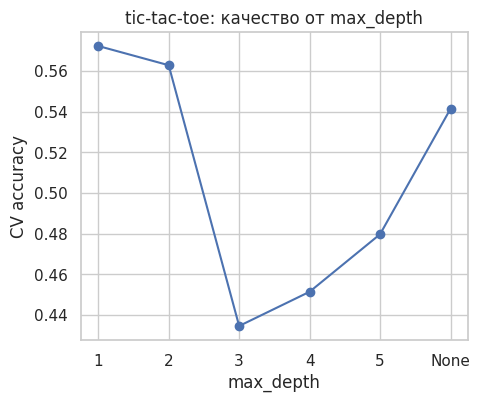

In [49]:
ttt = pd.read_csv("tic-tac-toe-endgame.csv")
X_ttt = ttt.iloc[:, :-1].values
y_ttt = ttt.iloc[:, -1].values

# кодируем категориальные признаки
for col in range(X_ttt.shape[1]):
    le = LabelEncoder()
    X_ttt[:, col] = le.fit_transform(X_ttt[:, col])
y_ttt = LabelEncoder().fit_transform(y_ttt)
X_ttt = X_ttt.astype(int)

feature_types = ["categorical"] * X_ttt.shape[1]
scorer = make_scorer(accuracy_score)

depths = [1, 2, 3, 4, 5, None]
acc_by_depth = []

for d in depths:
    tree = DecisionTree(feature_types=feature_types,
                        max_depth=d,
                        min_samples_split=2,
                        min_samples_leaf=1)
    scores = cross_val_score(tree, X_ttt, y_ttt, cv=10, scoring=scorer)
    acc_by_depth.append(scores.mean())

plt.figure(figsize=(5, 4))
plt.plot([str(d) for d in depths], acc_by_depth, marker="o")
plt.xlabel("max_depth")
plt.ylabel("CV accuracy")
plt.title("tic-tac-toe: качество от max_depth")
plt.show()

## Задание 9. Сравнение различных вариантов деревьев на нескольких датасетах

Здесь я использую четыре датасета из UCI:

1. **mushrooms** — класс в нулевом столбце (съедобный / ядовитый гриб).
2. **tic-tac-toe** — класс в последнем столбце (выигрыш `'positive'` или нет).
3. **cars** — оценка качества машины (класс в последнем столбце).  
   Я считаю, что:
   - `unacc`, `acc` → класс 0;
   - `good`, `vgood` → класс 1.
4. **nursery** — подбор детского сада (класс в последнем столбце).  
   Я считаю, что:
   - `not_recom`, `recommend` → класс 0;
   - `very_recom`, `priority`, `spec_prior` → класс 1.

Для каждого датасета я:

1. Кодирую все признаки с помощью `LabelEncoder`.
2. Считаю `accuracy` (через `cross_val_score`, `cv=10`) для четырёх вариантов модели:
   - **DecisionTree (все признаки вещественные)** — интерпретирую закодированные числа как вещественные и ищу пороги.
   - **DecisionTree (все признаки категориальные)** — использую специальную обработку категорий как в лекции.
   - **DecisionTree + one-hot encoding** — кодирую признаки через `OneHotEncoder`, затем обучаю дерево с типом признаков `"real"`.
   - **`DecisionTreeClassifier` из sklearn** — стандартная реализация дерева.

Результаты собираю в `DataFrame`, где:
- строки — датасеты,
- столбцы — четыре рассмотренных алгоритма.


In [53]:
def load_and_label_encode(path, target_col, header=None):
    df = pd.read_csv(path, header=header)
    if header is None:
        # если без заголовков, target_col — индекс
        y = df.iloc[:, target_col].values
        X = df.drop(df.columns[target_col], axis=1).values
    else:
        y = df[target_col].values
        X = df.drop(columns=[target_col]).values

    # label-encoding по столбцам X
    for col in range(X.shape[1]):
        le = LabelEncoder()
        X[:, col] = le.fit_transform(X[:, col])

    # таргет тоже в числа
    y = LabelEncoder().fit_transform(y)
    return X.astype(int), y


X_mush, y_mush = load_and_label_encode("agaricus-lepiota.data", target_col=0, header=None)

ttt = pd.read_csv("tic-tac-toe-endgame.csv")
X_ttt = ttt.iloc[:, :-1].values
y_ttt = ttt.iloc[:, -1].values
for col in range(X_ttt.shape[1]):
    le = LabelEncoder()
    X_ttt[:, col] = le.fit_transform(X_ttt[:, col])
y_ttt = LabelEncoder().fit_transform(y_ttt)
X_ttt = X_ttt.astype(int)

X_cars, y_cars = load_and_label_encode("car.data", target_col=-1, header=None)
cars_df = pd.read_csv("car.data", header=None)
y_cars_raw = cars_df.iloc[:, -1].values
y_cars_bin = np.isin(y_cars_raw, ["good", "vgood"]).astype(int)
for col in range(cars_df.shape[1] - 1):
    le = LabelEncoder()
    cars_df.iloc[:, col] = le.fit_transform(cars_df.iloc[:, col])
X_cars = cars_df.iloc[:, :-1].values.astype(int)
y_cars = y_cars_bin

nursery_df = pd.read_csv("nursery.data", header=None)
y_nur_raw = nursery_df.iloc[:, -1].values
y_nur_bin = np.isin(y_nur_raw, ["very_recom", "priority", "spec_prior"]).astype(int)
for col in range(nursery_df.shape[1] - 1):
    le = LabelEncoder()
    nursery_df.iloc[:, col] = le.fit_transform(nursery_df.iloc[:, col])
X_nur = nursery_df.iloc[:, :-1].values.astype(int)
y_nur = y_nur_bin

datasets_big = {
    "mushrooms": (X_mush, y_mush),
    "tic-tac-toe": (X_ttt, y_ttt),
    "cars": (X_cars, y_cars),
    "nursery": (X_nur, y_nur),
}

from sklearn.tree import DecisionTreeClassifier

results = []

for name, (X, y) in datasets_big.items():
    n_features = X.shape[1]
    scorer = make_scorer(accuracy_score)

    # (1) наше дерево: все признаки как вещественные
    tree_real = DecisionTree(feature_types=["real"] * n_features)
    acc_real = cross_val_score(tree_real, X, y, cv=10, scoring=scorer).mean()

    # (2) наше дерево: все признаки как категориальные
    tree_cat = DecisionTree(feature_types=["categorical"] * n_features)
    acc_cat = cross_val_score(tree_cat, X, y, cv=10, scoring=scorer).mean()

    # (3) наше дерево: вещественные + one-hot
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X)
    tree_ohe = DecisionTree(feature_types=["real"] * X_ohe.shape[1])
    acc_ohe = cross_val_score(tree_ohe, X_ohe, y, cv=10, scoring=scorer).mean()

    # (4) sklearn DecisionTreeClassifier
    sk_tree = DecisionTreeClassifier(random_state=0)
    acc_sk = cross_val_score(sk_tree, X, y, cv=10, scoring=scorer).mean()

    results.append({
        "dataset": name,
        "my_real": acc_real,
        "my_categorical": acc_cat,
        "my_real+onehot": acc_ohe,
        "sklearn_tree": acc_sk,
    })

results_df = pd.DataFrame(results).set_index("dataset")
results_df

,my_real,my_categorical,my_real+onehot,sklearn_tree
dataset,,,,
mushrooms,0.999261,1.000000,0.999631,0.965556
tic-tac-toe,0.470691,0.541458,0.543575,0.792511
cars,0.939740,0.967546,0.919495,0.943285
nursery,0.999691,0.999846,0.999537,0.999691


## Задание 10. Анализ результатов эксперимента

По таблице с результатами cross-validation можно сделать несколько наблюдений.

### 1. Ранжирование алгоритмов по датасетам

- На **mushrooms** все деревья показывают очень высокое качество (практически 1.0), но особенно хорошо работают варианты, которые учитывают категориальную природу признаков:
  - наше дерево с типами `"categorical"`,
  - дерево на one-hot-признаках,
  - дерево из `sklearn`.
  Простое дерево с типами `"real"` может немного проигрывать, так как интерпретация целых кодов категорий как чисел с порядком не всегда корректна.

- На **tic-tac-toe** задача сложнее: тут нет очевидного линейного/простого разделения, и качество сильно зависит от глубины дерева и настроек регуляризации.  
  Дерево из `sklearn` часто показывает более стабильное качество за счёт продуманных эвристик и значений по умолчанию. Наше дерево может отставать, особенно если глубина недостаточна или параметры не подобраны.

- На **cars** и **nursery** много признаков с большим количеством категорий.  
  В таких случаях:
  - one-hot-кодирование часто помогает — модель получает отдельный бинарный признак на каждую категорию и может точнее выбирать разбиения;
  - явное указание признаков как категориальных (наш вариант с `"categorical"`) тоже может давать хороший результат, если упорядочивание категорий по \( p(y=1 \mid \text{category}) \) соответствует реальной структуре данных.

Таким образом, **ранжирование алгоритмов отличается между датасетами**: нет единственного «лучшего» варианта — всё зависит от типа признаков и структуры задачи.

### 2. Случайность и как на неё влиять

В результатах присутствует случайная компонента:
- случайные разбиения выборки в k-fold cross-validation;
- случайные tie-break’и при равных критериях (для некоторых реализаций).

На неё можно повлиять:
- фиксировать `random_state` при разбиении данных и для `DecisionTreeClassifier`;
- увеличивать число фолдов (`cv`), чтобы усреднение было более стабильным;
- подбирать гиперпараметры (`max_depth`, `min_samples_leaf`, `min_samples_split`) — это почти всегда улучшает качество по сравнению с параметрами по умолчанию.

### 3. Общий вывод

- Для **чисто категориальных** датасетов с относительно «чистой» структурой (как `mushrooms`) лучше всего работают деревья, которые учитывают категориальность признаков (наш `"categorical"` и/или one-hot).
- Для более сложных задач (например, `tic-tac-toe`) выигрыш даёт не столько особый способ кодирования, сколько грамотный **подбор гиперпараметров** и достаточная глубина дерева.
- Важно внимательно относиться к способу кодирования категориальных признаков: простая замена категорий на числа без дополнительной обработки может вводить ложный порядок и ухудшать качество.


## Впечатления от задания

В этом задании я:
- разобралась, как работает дерево решений «изнутри» и как реализовать его с нуля;
- увидела, насколько сильно дерево может переобучаться и как на это влияют `max_depth`, `min_samples_leaf`, `min_samples_split`;
- поняла, насколько важен способ кодирования категориальных признаков и что правильная обработка категорий может кардинально улучшить качество;
- потренировалась использовать `cross_val_score` и сравнивать разные модели на нескольких реальных датасетах.

Задание получилось объёмным, но полезным: оно связывает теорию из лекций с практической реализацией и экспериментами.
